# Titanic - Machine Learning from Disater (Kaggle Competition)

## LOADING

Load libraries and files as pandas dataframe

In [40]:
# Data manipulation packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling packages
from sklearn import svm
from sklearn.model_selection import train_test_split
from itertools import combinations

# Filter all warnings. 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Open the local files
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [3]:
# Load local files as pandas dataframe
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

## DISCOVERING

Describe the train and test dataset and show the first 6 entries

In [4]:
# Examine passenger data in train dataset
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
# Examine passengers data in test dataset
test.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [6]:
# Check for possible outliers for the train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check for possible outliers for the test dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Identifying missing value in train and test datasets

In [8]:
# Check for nulls for the train dataset
null_check_train = train.isnull().sum()
null_check_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Show the nulls in Age, Cabin, and Embarked variables in percentage
null_age_train_percent = round(null_check_train['Age']/(len(train['Age'])/100),2)
null_cabin_train_percent = round(null_check_train['Cabin']/(len(train['Cabin'])/100),2)
null_embarked_train_percent = round(null_check_train['Embarked']/(len(train['Embarked'])/100),2)
print(null_age_train_percent,'% of data in Age variable are missing.')
print(null_cabin_train_percent,'% of data in Cabin variable are missing.')
print(null_embarked_train_percent,'% of data in Embarked variable are missing.')

19.87 % of data in Age variable are missing.
77.1 % of data in Cabin variable are missing.
0.22 % of data in Embarked variable are missing.


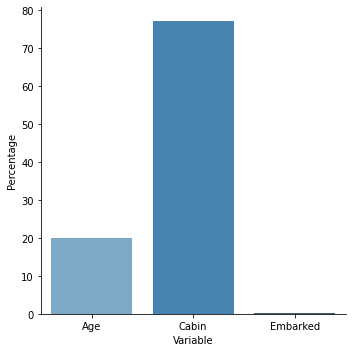

In [10]:
# The bar plot of missing values in percentage for train dataset
df_null_train = pd.DataFrame({'Variable':['Age','Cabin','Embarked'],
                              'Percentage':[null_age_train_percent,
                                            null_cabin_train_percent,
                                            null_embarked_train_percent]})
sns.catplot(x='Variable',y='Percentage',kind='bar', data=df_null_train,palette="Blues_d")
plt.show()

In [11]:
# Check for nulls for the test dataset
null_check_test = test.isnull().sum()
null_check_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# Show the nulls in Age, Fare, and Cabin variables in percentage
null_age_test_percent = round(null_check_test['Age']/(len(test['Age'])/100),2)
null_fare_test_percent = round(null_check_test['Fare']/(len(test['Fare'])/100),2)
null_cabin_test_percent = round(null_check_test['Cabin']/(len(test['Cabin'])/100),2)

print(null_age_test_percent,'% of data in Age variable are missing.')
print(null_fare_test_percent,'% of data in Embarked variable are missing.')
print(null_cabin_test_percent,'% of data in Cabin variable are missing.')

20.57 % of data in Age variable are missing.
0.24 % of data in Embarked variable are missing.
78.23 % of data in Cabin variable are missing.


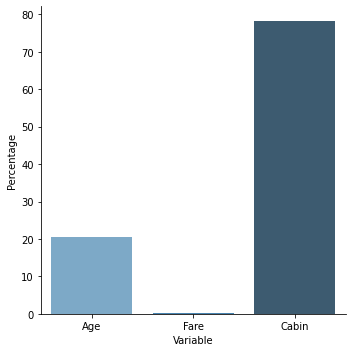

In [13]:
# The bar plot of missing values in percentage for test dataset
df_null_test = pd.DataFrame({'Variable':['Age','Fare','Cabin'],
                              'Percentage':[null_age_test_percent,
                                            null_fare_test_percent,
                                            null_cabin_test_percent]})
sns.catplot(x='Variable',y='Percentage',kind='bar', data=df_null_test,palette="Blues_d")
plt.show()

## FILLING MISSING VALUES

Fill the missing values in Age variable

In [14]:
# Fill the missing values of Age variable in train dataset with median
age_median_train = train['Age'].dropna().median()
train['Age'] = train['Age'].fillna(age_median_train)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

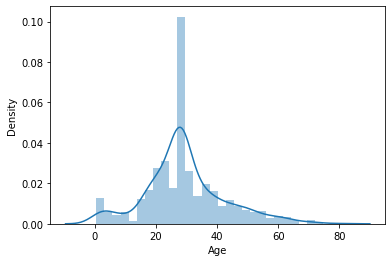

In [15]:
# The histogram of Age variable after filling missing values for train dataset
sns.distplot(train['Age'])
plt.show()

In [16]:
# Fill the missing values of Age variable in test dataset with median
age_median_test = test['Age'].dropna().median()
test['Age'] = test['Age'].fillna(age_median_test)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

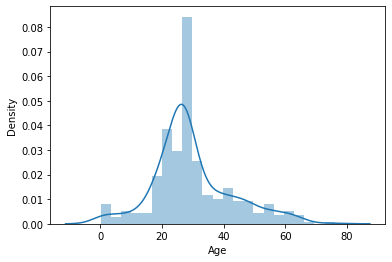

In [17]:
# The histogram of Age variable after filling missing values for test dataset
sns.distplot(test['Age'])
plt.show()

Fill the missing values in Fare variable

In [18]:
# Fill the missing values of Fare variable in test dataset with median
fare_median_test = test['Fare'].dropna().median()
test['Fare'] = test['Fare'].fillna(fare_median_test)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

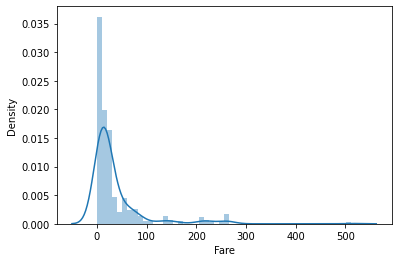

In [19]:
# The histogram of Fare variable after filling missing values for test dataset
sns.distplot(test['Fare'])
plt.show()

Fill the missing values in Embarked variable

In [20]:
# Fill the missing values of Embarked variable in train dataset with "S"
print(train['Embarked'].unique())
print(len(train[train['Embarked'] == 'S']), 'of S are in Embarked variable.')
print(len(train[train['Embarked'] == 'C']), 'of C are in Embarked variable.')
print(len(train[train['Embarked'] == 'Q']), 'of Q are in Embarked variable.')
train['Embarked'] = train['Embarked'].fillna('S')
print(train['Embarked'].unique())
train.isnull().sum()

['S' 'C' 'Q' nan]
644 of S are in Embarked variable.
168 of C are in Embarked variable.
77 of Q are in Embarked variable.
['S' 'C' 'Q']


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

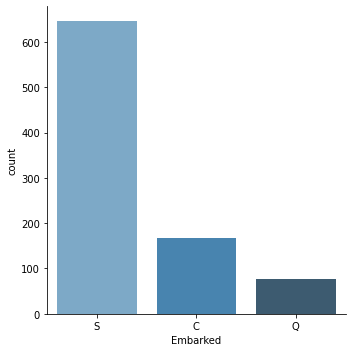

In [21]:
# The bar plot of Embarked variable after filling missing values for train dataset
sns.catplot(x='Embarked',kind='count', data=train,palette="Blues_d")
plt.show()

## FITTING THE MODEL

Check the correlation between variables in train dataset

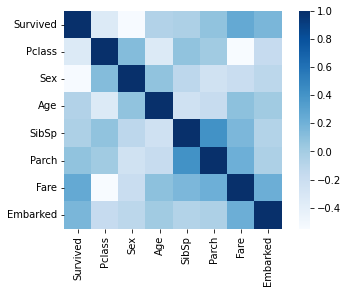

In [22]:
# The correlation between variables
train['Sex'] = train['Sex'].map({'male':1,'female':0})
train['Embarked'] = train['Embarked'].map({'S':1,'Q':2,'C':3})
sns.heatmap(train.drop('PassengerId',axis=1).corr(),square=True, cmap='Blues')
plt.show()

In [23]:
train.drop('PassengerId',axis=1).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


Fit Supprt Vector Machine (SVC) models to find the most fitted model by making a test and a train part from the train data and comparing the accuracy of models

In [24]:
# A SVC model with variables Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked
variables_0 = ['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' ,'Fare','Embarked']
X0 = train[variables_0]
y = train['Survived']
X0_train, X0_test, y_train, y_test = train_test_split(X0, y, test_size=0.2)

model_0 = svm.SVC(kernel='linear').fit(X0_train, y_train)
accuracy0 = model_0.score(X0_test, y_test)
print('The accuracy of model_0 is ', round(accuracy0*100,2),'%.',sep='')

The accuracy of model_0 is 86.03%.


In [25]:
# SVC models without one variable
variables_pool = ['Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' ,'Fare','Embarked']
for variable in variables_pool :
  X_one = train[variables_pool].drop(variable,axis=1)
  X_one_train, X_one_test, y_train, y_test = train_test_split(X_one, y, test_size=0.2)
  model_one = svm.SVC(kernel='linear').fit(X_one_train, y_train)
  accuracy_one = model_one.score(X_one_test, y_test)
  if accuracy_one >= accuracy0:
    print('The accuracy of model without variable ', variable, ' is ', round(accuracy_one*100,2),'%.',sep='')

The accuracy of model without variable Fare is 86.03%.


In [26]:
# SVC models without two variables
variables_pool_2 = list(combinations(variables_pool,2))
for variable in variables_pool_2 :
  X_two = train[variables_pool].drop([variable[0],variable[1]],axis=1)
  X_two_train, X_two_test, y_train, y_test = train_test_split(X_two, y, test_size=0.2)
  model_two = svm.SVC(kernel='linear').fit(X_two_train, y_train)
  accuracy_two = model_two.score(X_two_test, y_test)
  if accuracy_two >= accuracy0:
    print('The accuracy of model without variables ', variable, ' is ', round(accuracy_two*100,2),'%.',sep='')

In [27]:
# SVC models without three variables
variables_pool_3 = list(combinations(variables_pool,3))
for variable in variables_pool_3 :
  X_three = train[variables_pool].drop([variable[0],variable[1],variable[2]],axis=1)
  X_three_train, X_three_test, y_train, y_test = train_test_split(X_three, y, test_size=0.2)
  model_three = svm.SVC(kernel='linear').fit(X_three_train, y_train)
  accuracy_three = model_three.score(X_three_test, y_test)
  if accuracy_three >= accuracy0:
    print('The accuracy of model without variables ', variable, ' is ', round(accuracy_three*100,2),'%.',sep='')

In [28]:
# SVC models without four variables
variables_pool_4 = list(combinations(variables_pool,4))
for variable in variables_pool_4 :
  X_four = train[variables_pool].drop([variable[0],variable[1],variable[2],variable[3]],axis=1)
  X_four_train, X_four_test, y_train, y_test = train_test_split(X_four, y, test_size=0.2)
  model_four = svm.SVC(kernel='linear').fit(X_four_train, y_train)
  accuracy_four = model_four.score(X_four_test, y_test)
  if accuracy_four >= accuracy0:
    print('The accuracy of model without variables ', variable, ' is ', round(accuracy_four*100,2),'%.',sep='')

## Prediction

In [34]:
variables_drop = []
x_test = test[variables_pool].drop(variables_drop,axis=1)
x_test['Sex'] = x_test['Sex'].map({'male':1,'female':0})
x_test['Embarked'] = x_test['Embarked'].map({'S':1,'Q':2,'C':3})
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,1
414,1,0,39.0,0,0,108.9000,3
415,3,1,38.5,0,0,7.2500,1
416,3,1,27.0,0,0,8.0500,1


In [35]:
X = train[variables_pool].drop(variables_drop,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = svm.SVC(kernel='linear').fit(X_train, y_train)
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred)

# Save the output in csv format

In [ ]:
from google.colab import drive
drive.mount('drive')

In [36]:
output = test.iloc[:,[0]].merge(y_pred,how='left',left_index=True,right_index=True).set_index('PassengerId').rename(columns={0:'Survived'})
output
output.to_csv('kaggle_sub_py.csv')

## Publish 

In [41]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/kaggle_titanic_pp.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/kaggle_titanic_pp.ipynb to html
[NbConvertApp] Writing 431457 bytes to /content/drive/MyDrive/ColabNotebooks/kaggle_titanic_pp.html
